In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
dataset = load_wine()
X1 = dataset["data"]
y1 = dataset["target"]
feature_names1 = dataset["feature_names"]


In [3]:
df=pd.DataFrame(data=X1,columns=feature_names1)

In [4]:
df['y']=y1

In [5]:
df.shape #There are available 178 records

(178, 14)

In [6]:
df.isna().sum() #There are not missiing values

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
y                               0
dtype: int64

In [7]:
df['y'].value_counts() #Number of elements for every class

1    71
0    59
2    48
Name: y, dtype: int64

In [8]:
tr=DecisionTreeClassifier()

In [9]:
tr.fit(X1,y1)

DecisionTreeClassifier()

In [10]:
dataset.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

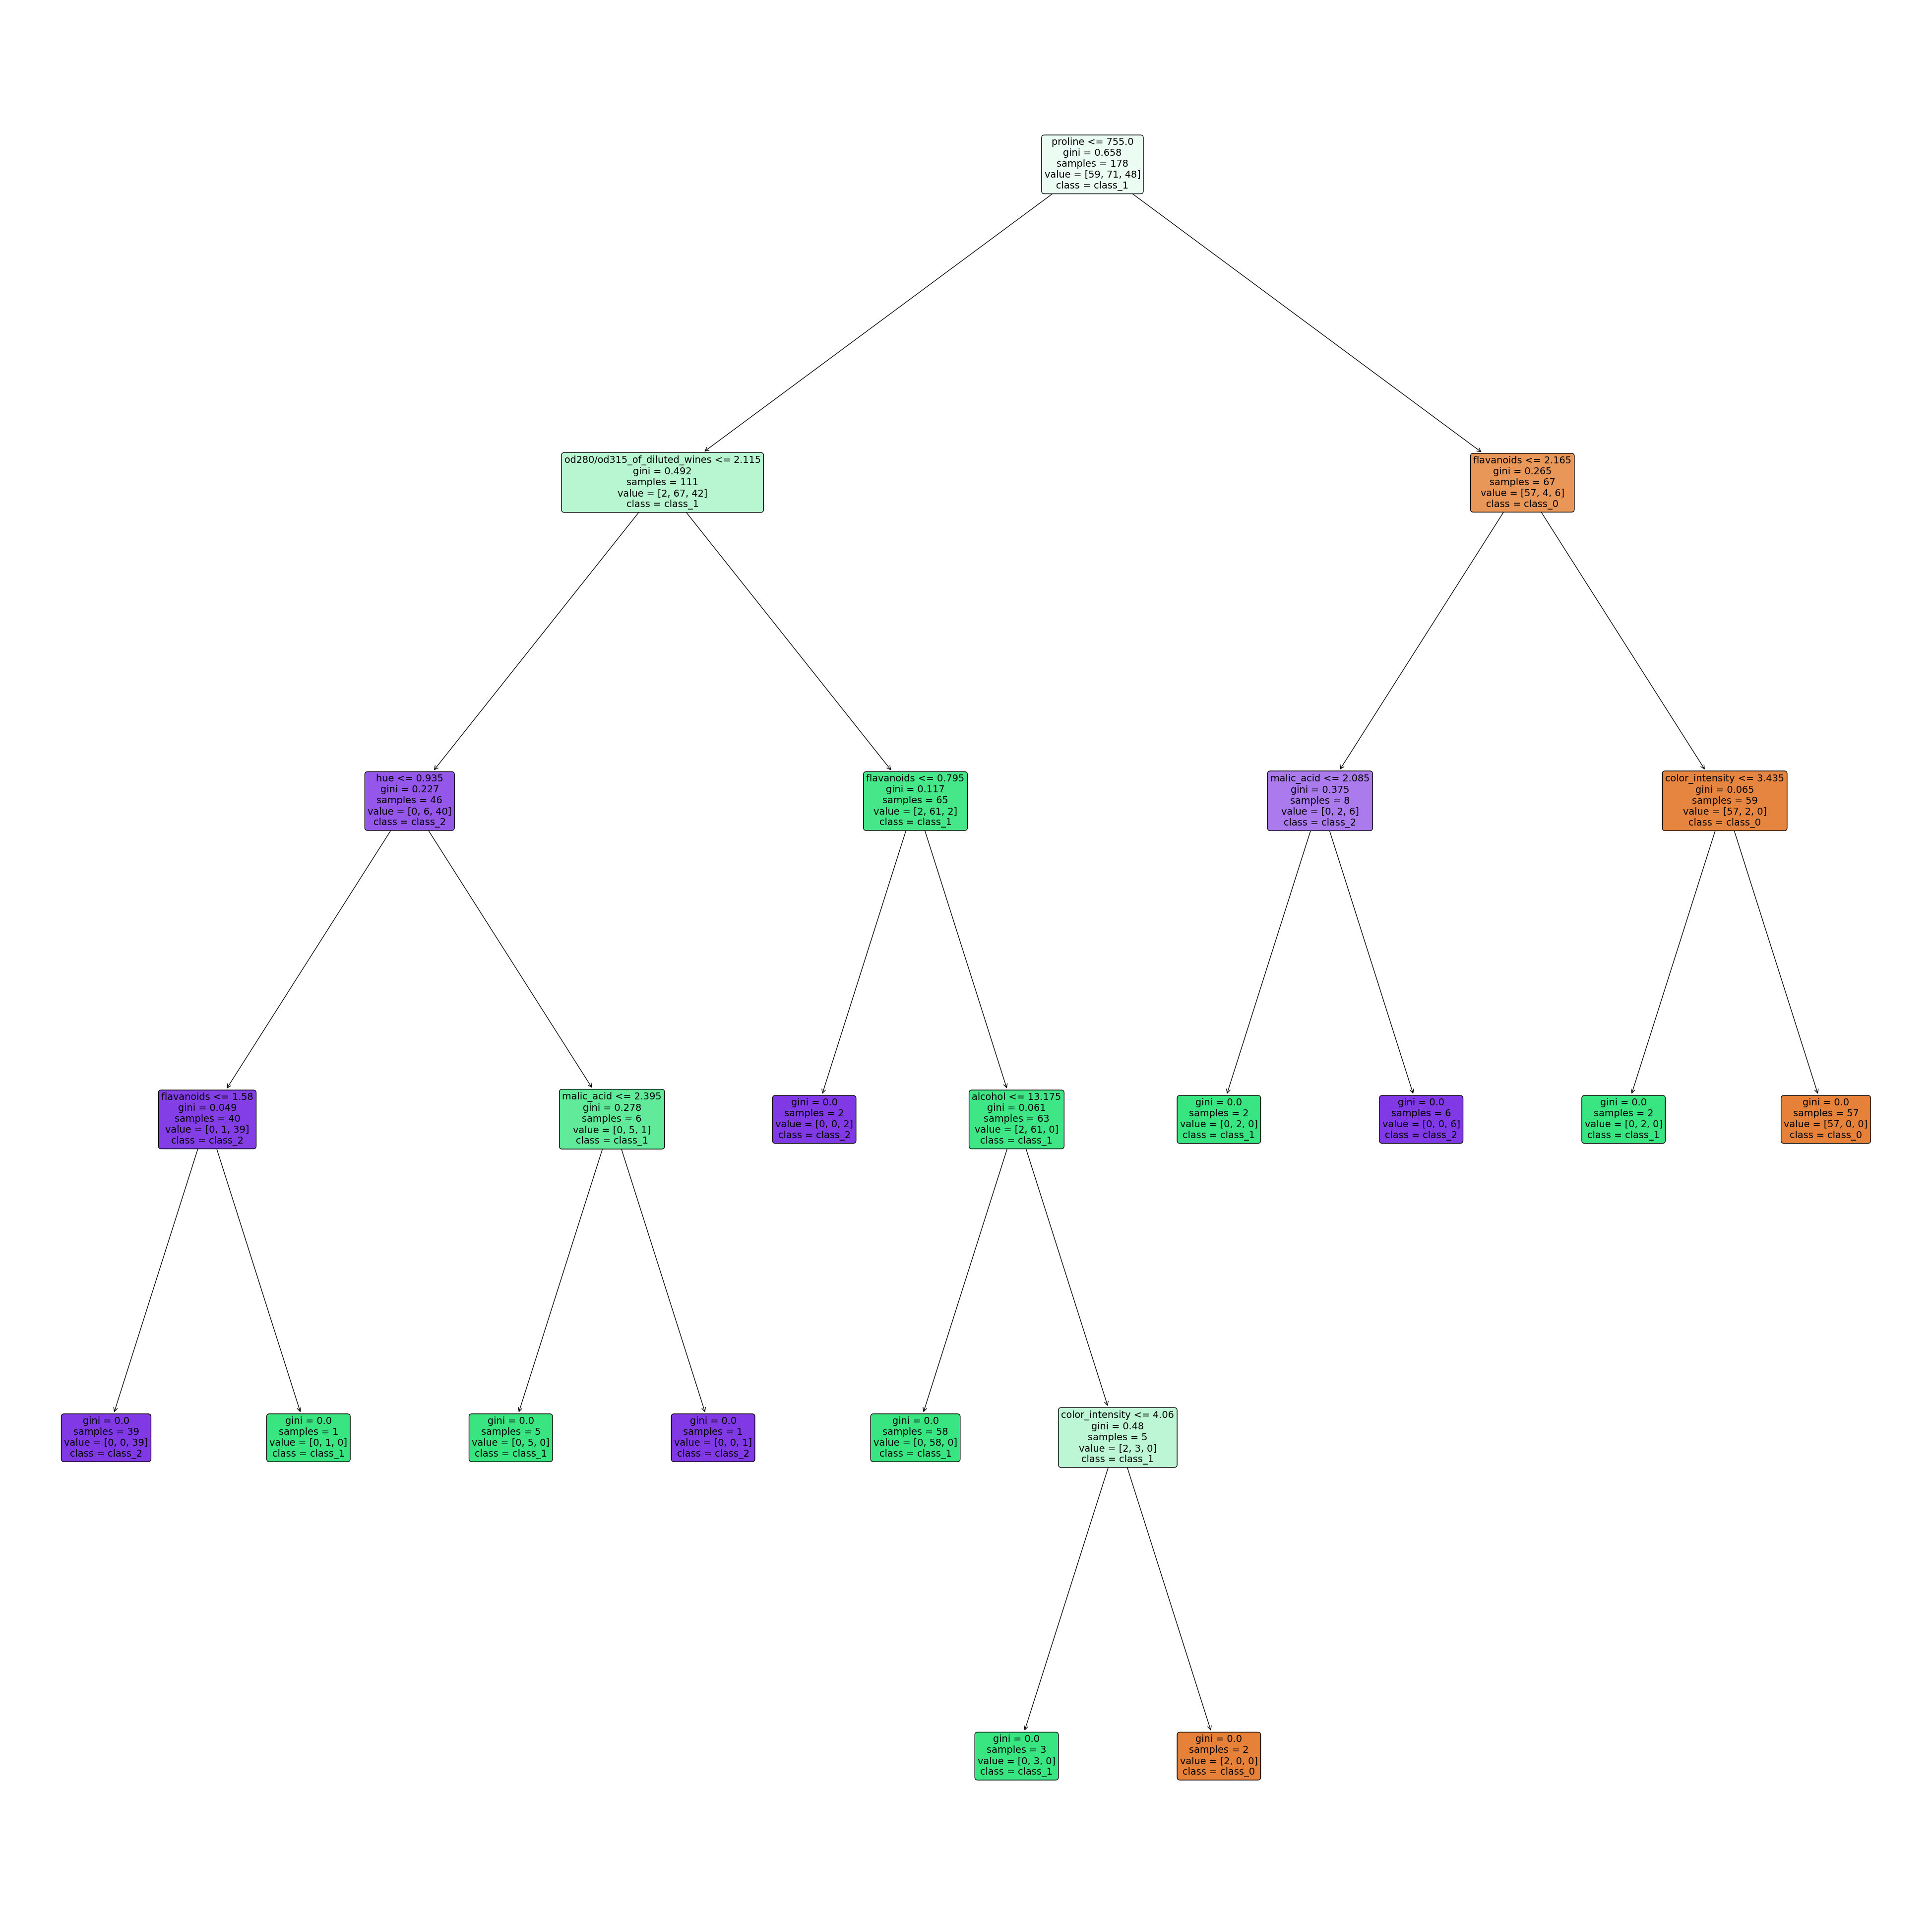

In [11]:
plt.figure(figsize=(50, 50))
plot_tree(tr, filled=True, feature_names=feature_names1 , class_names=dataset.target_names, rounded=True)
plt.show()

#From the desicion tree we can say that the tree is starting by the last feature that is the proline, depending if the value get a proline less or equal to 755, we will analize another 2 features.
# with respect to the overfiting, in the last nodes of the tree, there are pretty little samples in the class 2 and 1 with respect to the class 0 if we take the way of flavonids and color_intensity but in the other side we use a lot of features and the samples are really short

In [12]:
pred=tr.predict(X1)

In [13]:
accuracy_score(y1,pred) #This result is a clear overfiting case, because the predictions and the y are exactly the same

1.0

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X1,y1,test_size=0.2)

In [15]:
tr.fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
y_pred=tr.predict(X_test)

In [17]:
accuracy_score(y_test,y_pred) #This is a good result

0.9166666666666666

In [18]:
metrics=classification_report(y_test,y_pred)

In [19]:
metrics

'              precision    recall  f1-score   support\n\n           0       0.92      1.00      0.96        11\n           1       1.00      0.84      0.91        19\n           2       0.75      1.00      0.86         6\n\n    accuracy                           0.92        36\n   macro avg       0.89      0.95      0.91        36\nweighted avg       0.93      0.92      0.92        36\n'

In [20]:
DecisionTreeClassifier

sklearn.tree._classes.DecisionTreeClassifier

In [21]:
from sklearn.model_selection import KFold
# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X1,y1,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices]
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]


In [22]:
#Now we are gonna make the decision tree with some changes in the parameters
from sklearn.model_selection import ParameterGrid
params = {
"max_depth": [None, 2, 4, 8],
"splitter": ["best", "random"],
"max_features":[13,7,3,10],
"ccp_alpha":[0,0.3,0.6,0.8]
}

max_accuracy = 0
best_config = None

for config in ParameterGrid(params):
    clf = DecisionTreeClassifier(**config)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_valid)
    val=(accuracy_score(y_valid,y_pred))

    for key, value in config.items():
        print(f"{key}: {value}")

    if val > max_accuracy:
            max_accuracy = val
            best_config = config
    

ccp_alpha: 0
max_depth: None
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: None
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 13
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 7
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 3
splitter: random
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: best
ccp_alpha: 0
max_depth: 2
max_features: 10
splitter: random
ccp_alpha: 0
max_depth: 4
max_features: 

In [23]:
print("Best Configuration:")
for key, value in best_config.items():
    print(f"{key}: {value}")
print(f"Best Accuracy: {max_accuracy:.4f}")

Best Configuration:
ccp_alpha: 0
max_depth: None
max_features: 13
splitter: random
Best Accuracy: 0.9643


In [24]:
syn=pd.read_csv("https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv")

In [25]:
syn
Xs=syn.loc[:,:'x1']
ys=syn.loc[:,'label']

In [26]:
syn

,x0,x1,label
0,9.833469,0.319565,0
1,1.801045,8.705072,0
2,4.423918,3.488906,1
3,0.280730,2.689037,1
4,5.999494,9.167512,0
...,...,...,...
495,4.995458,8.437083,0
496,6.636632,9.931535,0
497,6.373259,8.098388,0
498,1.230331,7.169844,1


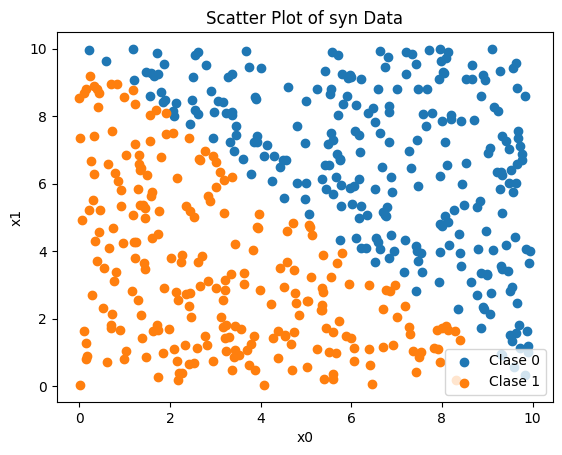

'\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.scatter(Xs[\'x0\'], Xs[\'x1\'],  c=ys, label="Clase 0")\nplt.xlabel(\'x0\')\nplt.ylabel(\'x1\')\nplt.title(\'Scatter Plot of syn Data\')\nplt.legend()\n#plt.legend(ys)\nplt.show()\n'

In [27]:
mask_0 = ys == 0
mask_1 = ys == 1

plt.scatter(Xs[mask_0]['x0'], Xs[mask_0]['x1'], label="Clase 0")
plt.scatter(Xs[mask_1]['x0'], Xs[mask_1]['x1'], label="Clase 1")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()

"""
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.scatter(Xs['x0'], Xs['x1'],  c=ys, label="Clase 0")
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Scatter Plot of syn Data')
plt.legend()
#plt.legend(ys)
plt.show()
"""


In [28]:
pt=DecisionTreeClassifier()

In [29]:
pt.fit(Xs,ys)


DecisionTreeClassifier()

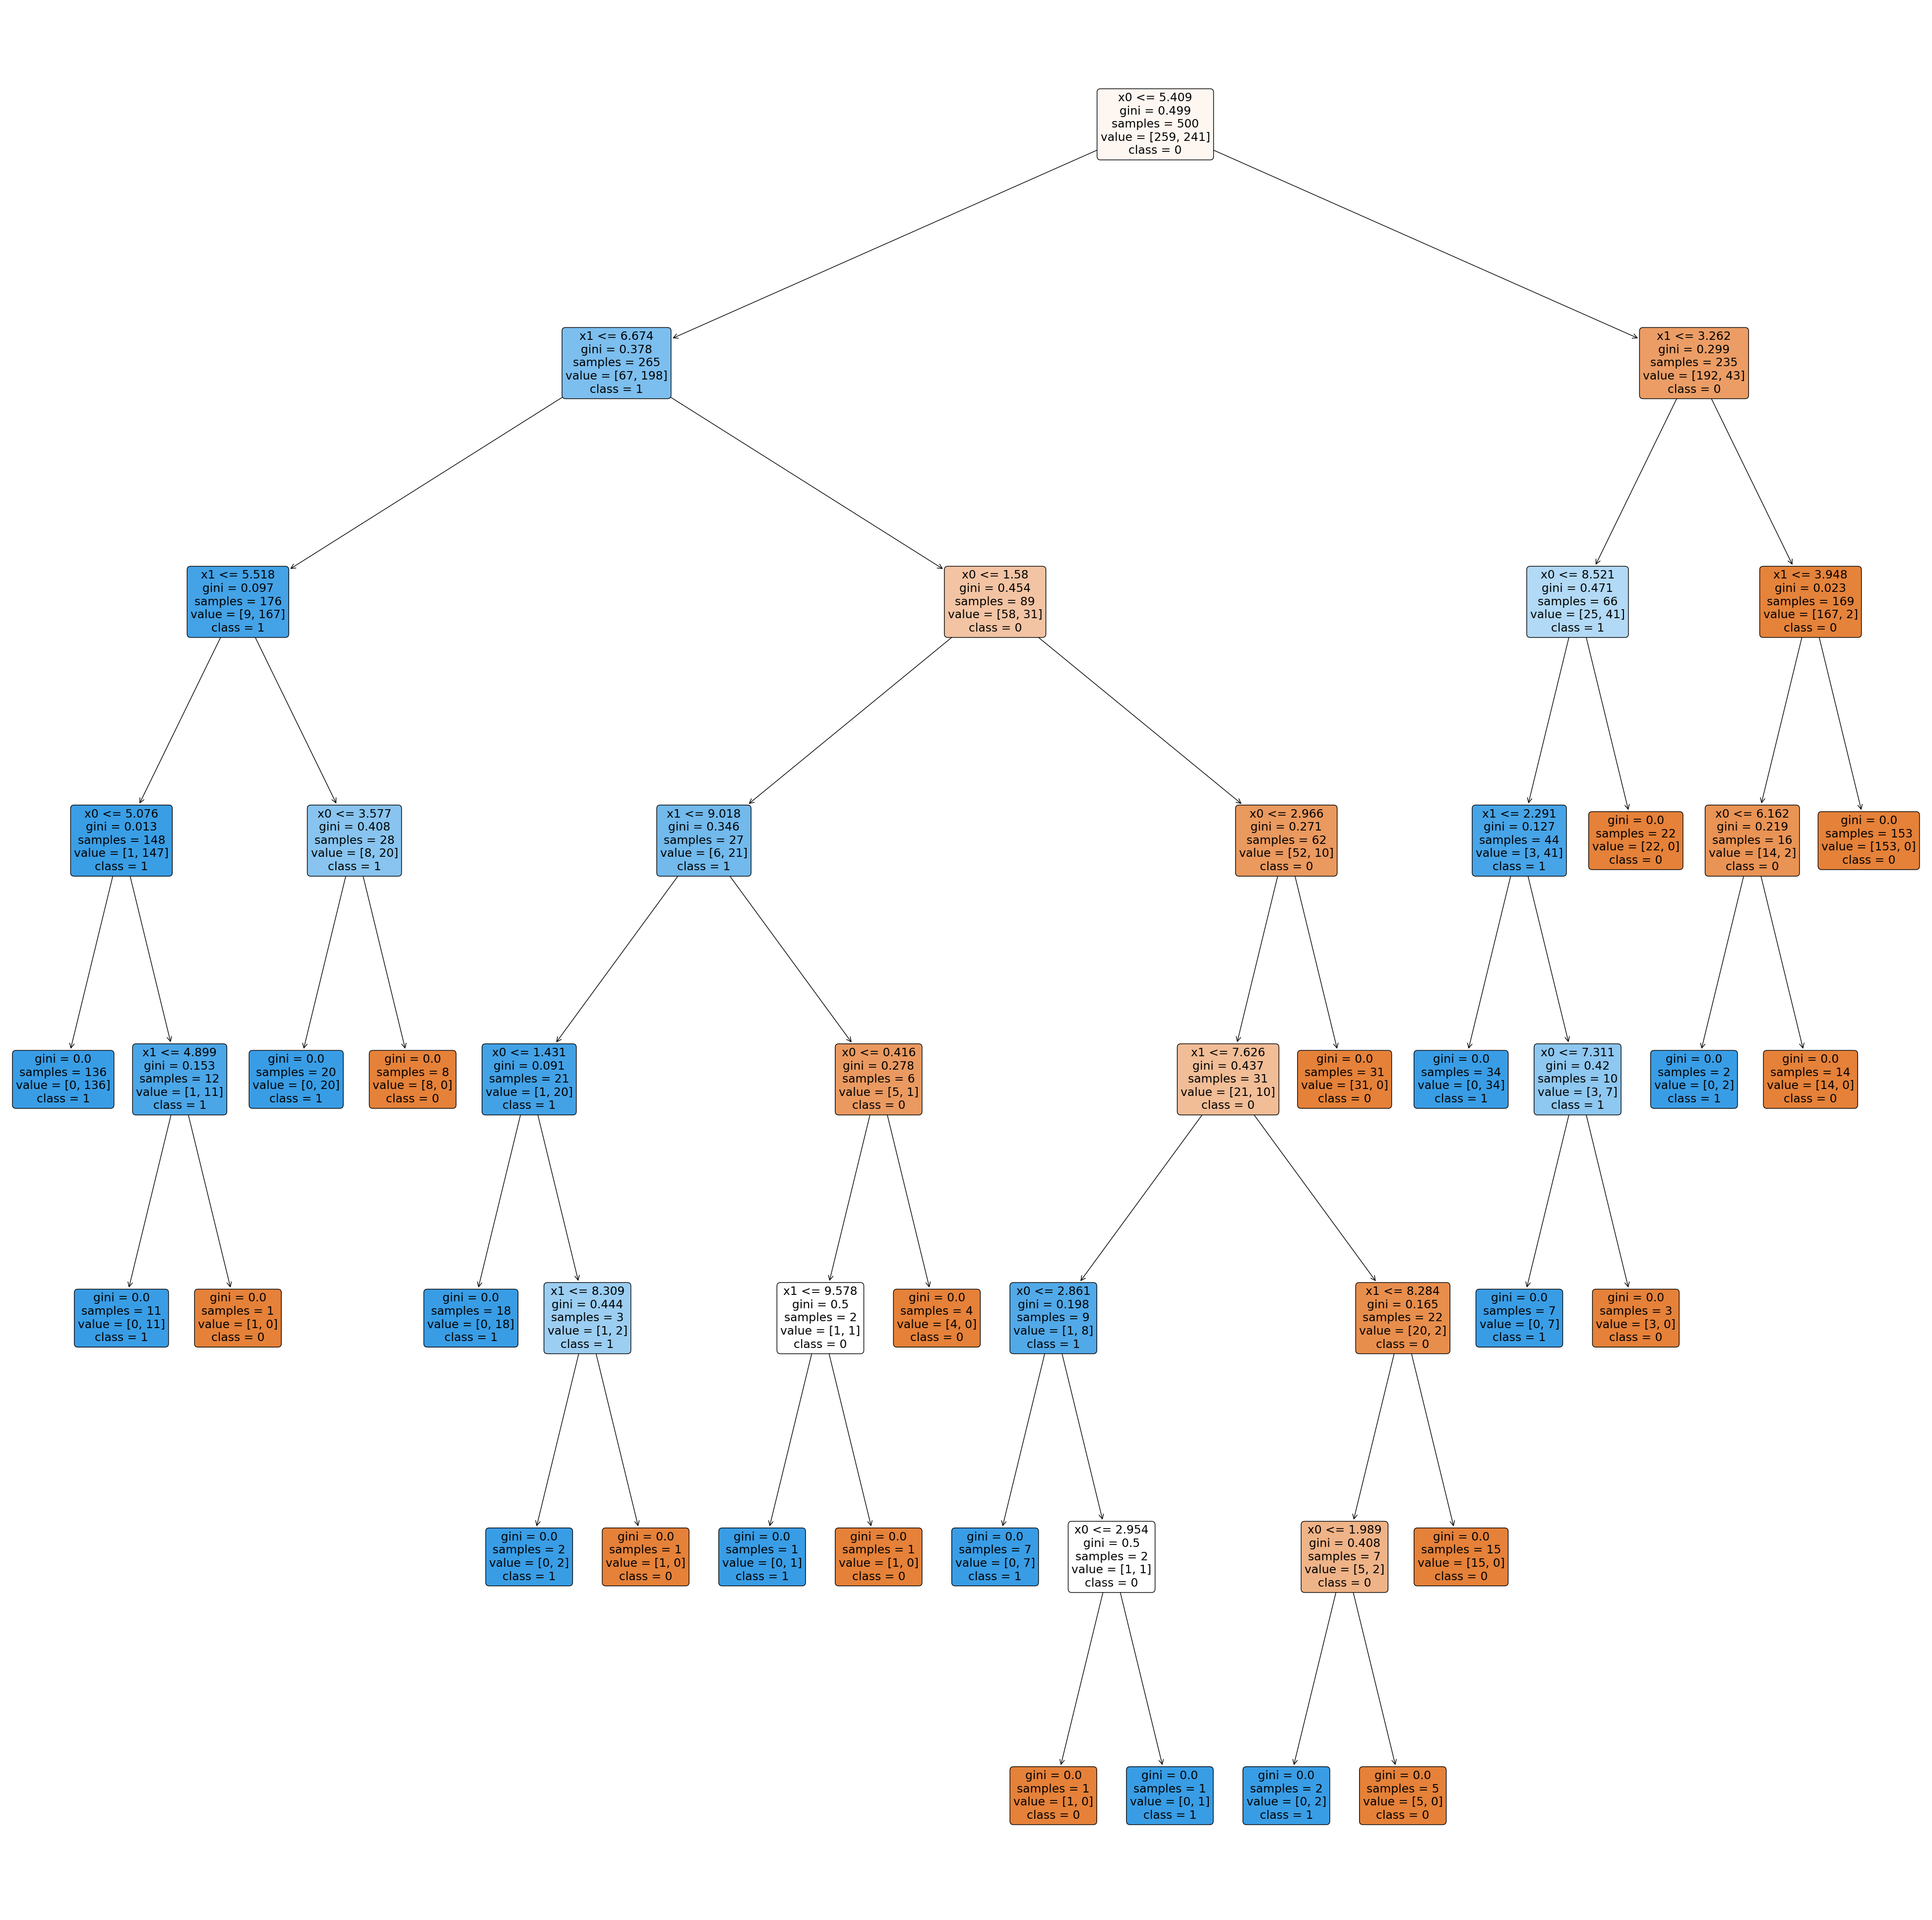

In [30]:
plt.figure(figsize=(50, 50))
plot_tree(pt, filled=True, feature_names=['x0','x1'] , class_names=['0','1'], rounded=True)
plt.show() #The tree is learning the division of the data



In [31]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml("mnist_784")
X = dataset["data"]
y = dataset["target"]


In [32]:
#Load the MNIST dataset into memory. Divide the 70,000 digits you have into a training set (60,000
#digits) and a test set (10,000 digits)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=10000)

In [33]:
a=DecisionTreeClassifier()

In [34]:
a.fit(X_train,y_train)
y_pred=a.predict(X_test)
accuracy_score(y_test,y_pred)

0.8724

In [35]:
X1.shape[0]

178

In [77]:
class MyRandomForestClassifer():
    def __init__(self,n_estimators,max_feautures):
        self.n=n_estimators#This is the number of trees used
        self.f=max_feautures#The max_feautures are based on the size of the subset of feautures, will be selected to make the split
        self.random_forest=[]

    #train the trees of this random forest using subsets of X (and y)

    def fit(self,X,y): #each n_estimator will have its own subset of data 
        import random as rn
        from math import ceil

        for i in range(self.n):
            # Let's sample the training set
            sample_indices = np.array(np.random.choice(ceil(X.shape[0] * 0.632), X.shape[0], replace=True))
            print(sample_indices)
            X_train_temp = X.loc[sample_indices] #The x is filtered by the sample N and B
            y_train_temp = y.loc[sample_indices]

            self.random_forest.append(DecisionTreeClassifier(max_features=self.f).fit(X_train_temp,y_train_temp))

        return self

    #predict the label for each point in X
    def predict(self,X): #each n_estimator must make a prediction
        from collections import Counter
        #the class selected by the highest number of trees is selected
        predictions = np.array([decision_tree_fitted.predict(X) for decision_tree_fitted in self.random_forest]).T
        final_predictions = [Counter(prediction).most_common(1)[0][0] for prediction in predictions]
        
        return 
    #np.array(final_predictions)

        

In [78]:
a=MyRandomForestClassifer(n_estimators=10,max_feautures=6)

In [76]:
X_train.loc[[20,21,26]]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
a.fit(X_train,y_train)

[35969 36164 18630 ... 32556  8878  6451]


KeyError: '[9680, 24450, 25614, 6384, 5596, 31319, 36693, 16062, 25541, 35280, 13479, 3333, 11462, 11222, 18184, 27783, 25914, 37607, 11878, 36639, 27352, 16985, 32368, 8006, 11308, 27955, 36399, 16745, 10391, 28342, 14976, 1182, 30628, 6840, 34858, 35357, 20010, 18763, 15135, 10506, 29729, 35900, 21903, 33174, 7493, 29070, 32807, 17044, 9647, 29932, 7027, 10578, 8576, 9800, 34708, 32173, 21172, 29006, 539, 32729, 33683, 7786, 1545, 31955, 10421, 24908, 16255, 19392, 16943, 9345, 17727, 29034, 1639, 10569, 35145, 33873, 18781, 4633, 11025, 1993, 12104, 25132, 16078, 28568, 12507, 35643, 11171, 711, 37704, 872, 11271, 3918, 11094, 2458, 18702, 7622, 8578, 27796, 1609, 18897, 13335, 14857, 5551, 14242, 4214, 23236, 27535, 31674, 37299, 30723, 23098, 33428, 23962, 37522, 10261, 12864, 1747, 32498, 16066, 7511, 37897, 135, 19225, 20791, 8592, 24356, 22894, 17124, 1601, 6959, 16143, 10167, 598, 4947, 14094, 35917, 27516, 13192, 12572, 20738, 753, 2605, 22300, 8497, 1200, 32560, 21675, 23112, 14183, 6513, 14550, 20954, 9613, 31122, 12900, 33600, 9418, 35231, 31352, 28358, 10817, 6044, 19112, 34744, 32478, 23902, 28266, 20271, 10656, 20095, 21136, 18262, 5834, 5877, 31079, 15007, 37231, 11578, 8025, 21671, 24937, 13213, 14133, 19682, 5916, 29181, 15136, 25519, 25936, 8579, 12397, 36989, 12185, 15553, 12949, 34492, 11051, 211, 18218, 29061, 15344, 34116, 18498, 10889, 22119, 5135, 4886, 17901, 5274, 1561, 26133, 19709, 13324, 4899, 5649, 1979, 29843, 18167, 31778, 14793, 15003, 21000, 28301, 24397, 21890, 37577, 13022, 15880, 13734, 5448, 33007, 33201, 17339, 20736, 19859, 22522, 11640, 8857, 15250, 37204, 15543, 35203, 29369, 8468, 21886, 8406, 29137, 33226, 33553, 8784, 28300, 24797, 2205, 3231, 9758, 24875, 1748, 21827, 20644, 33647, 37713, 19009, 29685, 5335, 3718, 14089, 1762, 31449, 27477, 27457, 30165, 34312, 35027, 5276, 13286, 36625, 18083, 14730, 18978, 784, 33524, 13262, 6005, 37715, 3509, 3254, 25061, 14003, 9500, 37416, 26457, 10855, 34660, 18613, 15571, 3390, 2455, 31376, 31704, 33684, 24629, 34398, 9296, 5509, 21955, 11152, 25315, 12005, 36338, 15212, 23379, 22118, 28673, 35846, 37596, 32856, 1252, 33667, 1110, 6621, 35313, 6197, 160, 24587, 36053, 20045, 11231, 36481, 8643, 27618, 25701, 36649, 21863, 14480, 17792, 14515, 24793, 8893, 34958, 15590, 717, 33749, 16637, 12589, 8664, 18193, 31941, 9275, 24610, 30107, 33743, 30315, 4199, 15035, 18996, 17186, 2245, 27214, 12094, 16186, 4930, 5717, 36624, 36902, 35230, 26346, 6427, 13118, 34671, 7392, 20098, 28963, 5562, 14263, 35793, 37519, 28823, 21558, 4201, 36089, 1101, 20063, 18123, 30284, 23957, 21657, 2055, 37237, 31860, 35550, 16647, 32401, 27466, 26113, 18734, 36020, 34083, 31343, 16915, 29347, 11269, 25251, 25916, 30362, 2575, 17508, 15605, 12771, 2521, 29892, 26533, 28737, 17129, 16376, 10769, 13137, 8233, 7247, 22797, 17613, 7161, 33746, 10345, 1559, 9, 36998, 26782, 10255, 54, 37319, 801, 26733, 8200, 8042, 2697, 20911, 8162, 30996, 2914, 4911, 1863, 16988, 31596, 6098, 5879, 19356, 29945, 24868, 13531, 10023, 29849, 7124, 20906, 37868, 33185, 6171, 4536, 24614, 9684, 8434, 16836, 29035, 17890, 21820, 11950, 35704, 20844, 29576, 36784, 34355, 14942, 23509, 12793, 7514, 13820, 3824, 11550, 15143, 10423, 30225, 28953, 5396, 23542, 31734, 25705, 1344, 821, 6766, 6136, 28452, 33619, 9919, 28629, 31697, 33254, 19379, 6941, 8458, 2865, 3114, 14466, 22931, 19150, 32166, 28147, 27412, 7145, 19111, 32192, 36312, 14119, 28692, 836, 36466, 27272, 169, 25143, 30462, 15814, 19241, 23497, 23784, 35327, 21489, 31419, 18515, 17553, 17842, 35596, 35026, 16315, 19698, 620, 15949, 25760, 8386, 35579, 9451, 22526, 26224, 22160, 10231, 21822, 22748, 23016, 7066, 23589, 37116, 24071, 22877, 7135, 27752, 34061, 8620, 18750, 1787, 22587, 12880, 28860, 10256, 33102, 36988, 23610, 33323, 36926, 4159, 3213, 28844, 27634, 7398, 31031, 445, 11587, 19045, 21406, 3121, 13864, 10834, 24067, 12837, 12093, 7415, 37849, 23052, 8570, 27213, 26545, 13596, 19516, 15801, 1274, 37462, 22645, 8525, 6025, 6300, 1311, 19876, 26954, 37518, 22934, 36634, 28644, 13862, 2297, 18840, 30351, 3642, 30798, 3428, 7123, 26107, 25185, 21010, 26042, 12400, 30611, 29855, 22718, 4360, 33869, 36563, 7642, 21688, 17475, 5627, 2743, 16529, 17686, 14888, 24817, 8416, 1580, 27647, 35297, 29242, 23632, 30698, 31390, 5120, 25775, 26414, 16483, 27103, 12437, 6038, 15382, 4056, 16931, 31337, 30480, 32879, 26643, 24575, 22381, 27791, 23954, 18154, 24927, 19056, 2553, 24095, 7442, 4850, 3906, 22322, 8240, 24645, 3059, 30189, 17402, 26998, 16318, 22022, 32106, 19222, 4238, 35506, 5796, 23100, 25545, 6645, 3182, 34753, 34099, 13001, 12912, 27748, 18523, 16396, 3151, 4086, 2746, 28094, 10236, 5096, 13824, 35875, 18434, 27678, 35756, 25044, 28256, 8001, 23884, 32130, 24334, 381, 10071, 35092, 16880, 7378, 5923, 13293, 24909, 21942, 8296, 34616, 20657, 4161, 9916, 13253, 24667, 26500, 7857, 37069, 36333, 37861, 21454, 36502, 6576, 7506, 6088, 9248, 25600, 11615, 28067, 11172, 35192, 18528, 18638, 18272, 26166, 4863, 5993, 30118, 1968, 29659, 14757, 36889, 1270, 1314, 32057, 2271, 22467, 17982, 26222, 18171, 18665, 10489, 33649, 35727, 26624, 10833, 16429, 29324, 2729, 6571, 2459, 33224, 27694, 5651, 10145, 12854, 28714, 19106, 8340, 23487, 9103, 16333, 32021, 28549, 23703, 24163, 13910, 3529, 31166, 33207, 5930, 8826, 7987, 7194, 27190, 27734, 7171, 36493, 35020, 23823, 7946, 35436, 13437, 17825, 4099, 1922, 4490, 24748, 9707, 6179, 7799, 21550, 2326, 3211, 5715, 10979, 22601, 27251, 17275, 5516, 37129, 28812, 25513, 26752, 2875, 30191, 37755, 34732, 9890, 3948, 34017, 35306, 37879, 4783, 4213, 6282, 13582, 13510, 22140, 31460, 2246, 14484, 35346, 23764, 16381, 8165, 15916, 22180, 16593, 35829, 15485, 3035, 30926, 33024, 12963, 11871, 20530, 25658, 4662, 26611, 20800, 1872, 14994, 17385, 593, 2073, 33626, 17454, 31803, 559, 3627, 24088, 27063, 27175, 24808, 20589, 10060, 29091, 27291, 5197, 13028, 4567, 35526, 19015, 18363, 35434, 2986, 17998, 1280, 11875, 30069, 29496, 3888, 9461, 24165, 9540, 4374, 35901, 15161, 34898, 34363, 35569, 31577, 5011, 4796, 26072, 12249, 14782, 6529, 18987, 22921, 25404, 33813, 30564, 20424, 31558, 17685, 24513, 31882, 33001, 28769, 6517, 646, 6698, 9270, 88, 11982, 9601, 1258, 21087, 30061, 28186, 32424, 20008, 20599, 34914, 2578, 22262, 33122, 27155, 9595, 15044, 3314, 7657, 1597, 9624, 21128, 33055, 3875, 33498, 14667, 36637, 31239, 16419, 22553, 31324, 35490, 33567, 29078, 15584, 22891, 37004, 28624, 12922, 23172, 7204, 21361, 28129, 23772, 6283, 7959, 35011, 18181, 2622, 32047, 19797, 33460, 1429, 23189, 20276, 14463, 12197, 143, 25480, 19989, 27484, 4433, 19361, 15028, 13450, 22462, 19067, 25060, 9669, 3011, 8543, 606, 11627, 36760, 34670, 30738, 35307, 33354, 15902, 1104, 36056, 10659, 14989, 1029, 21767, 32455, 10200, 18324, 8148, 8021, 33280, 33193, 4998, 28476, 914, 20540, 1537, 25443, 23145, 17182, 7213, 25217, 1850, 6165, 36181, 18928, 32274, 26214, 19607, 11731, 28830, 18711, 25511, 22226, 30878, 17684, 33372, 10006, 2547, 23761, 19209, 18973, 16759, 23256, 4596, 30167, 33759, 8010, 18377, 36084, 25463, 4182, 30208, 23038, 36245, 6818, 16844, 36108, 32748, 28822, 24723, 30660, 19282, 19020, 32770, 16179, 34713, 29015, 35847, 180, 30661, 18084, 16220, 23463, 28729, 8508, 3523, 18693, 6558, 25518, 37476, 238, 19278, 31946, 7425, 27884, 14933, 18156, 1963, 612, 10618, 37783, 37724, 37251, 15962, 5246, 3065, 8389, 15738, 4417, 36444, 32479, 23276, 22072, 8982, 3374, 33506, 12445, 36524, 22700, 10576, 31883, 17995, 105, 22686, 14879, 36883, 34655, 5829, 2313, 29, 21390, 10891, 6829, 37412, 37353, 19191, 19933, 14349, 19926, 1864, 36103, 5063, 10392, 7409, 12064, 18722, 31893, 35895, 6688, 30525, 20777, 9044, 24063, 9592, 2382, 33916, 15312, 4395, 599, 14039, 32312, 34806, 9003, 23425, 27139, 20503, 29983, 37234, 1610, 9254, 28088, 21355, 22332, 4918, 19169, 11829, 25737, 7986, 2166, 15517, 31060, 8146, 17292, 35381, 30855, 320, 30290, 2763, 33018, 3536, 18547, 33015, 30796, 30015, 14727, 20443, 10310, 33526, 25112, 3911, 6774, 31707, 27478, 26280, 28216, 1899, 21968, 17264, 22585, 30852, 617, 1843, 24720, 30620, 690, 19812, 22764, 29850, 5341, 2356, 9405, 17500, 4728, 190, 37766, 4817, 12196, 21999, 8280, 22386, 24342, 3044, 19330, 29423, 18286, 35638, 14815, 31157, 4766, 28553, 13292, 16225, 18139, 37384, 24763, 29697, 18952, 14407, 21314, 19414, 12683, 31807, 34429, 17944, 10322, 5849, 36501, 3217, 27454, 31619, 9310, 36962, 14100, 21586, 31583, 16955, 37206, 21868, 31815, 20610, 18834, 23833, 4097, 18697, 9882, 36788, 36117, 12481, 4165, 28395, 9993, 33221, 30241, 34715, 21315, 36147, 22203, 31806, 25178, 3436, 11047, 6468, 9231, 7016, 27239, 30908, 2953, 25158, 21371, 14706, 12927, 21737, 30710, 34941, 22852, 15257, 27580, 31593, 27559, 30823, 6811, 12163, 24553, 18049, 342, 27482, 27094, 37404, 4093, 3872, 37252, 25966, 8910, 29174, 12503, 3207, 36841, 12890, 32657, 1267, 4966, 10182, 7147, 18288, 2899, 21817, 31752, 16868, 34365, 30185, 13880, 13229, 5760, 28142, 32179, 36094, 14532, 15514, 4028, 14129, 6426, 16839, 29690, 9572, 1810, 28640, 34994, 29899, 33440, 20660, 25182, 11508, 22540, 8288, 1493, 25928, 13363, 13881, 23924, 12351, 28537, 27942, 37082, 13061, 20262, 18886, 569, 17576, 27127, 19336, 7064, 23958, 4314, 8439, 165, 4257, 35441, 11526, 23520, 10339, 5324, 25897, 33187, 21664, 6824, 25176, 11443, 24611, 16736, 36391, 20088, 23394, 718, 6007, 33664, 4526, 2211, 9431, 21274, 24153, 10176, 32911, 28069, 28, 15745, 6382, 17854, 14760, 35767, 1358, 8895, 4988, 14188, 33727, 16763, 22655, 18584, 28932, 25086, 23716, 24679, 21302, 10031, 32679, 8556, 15775, 11354, 21426, 7487, 18089, 3736, 14108, 10555, 30549, 9346, 24252, 14986, 3965, 28399, 22030, 5992, 24109, 22234, 24486, 8806, 17351, 33523, 11021, 4069, 4408, 31626, 14704, 20582, 7144, 34514, 17405, 8234, 11332, 6835, 623, 78, 34328, 5682, 9380, 33832, 14583, 21857, 26737, 28806, 25742, 9104, 13241, 30570, 30722, 36336, 21243, 1896, 24922, 25058, 8787, 15985, 31766, 7306, 23921, 34904, 13129, 15755, 25349, 35898, 26422, 15533, 14724, 27335, 31599, 18020, 7307, 30752, 26268, 32310, 4587, 14390, 7315, 24322, 4517, 14831, 17002, 10304, 13990, 26433, 36078, 25236, 5108, 24306, 13114, 5644, 13232, 18188, 27124, 6850, 30567, 4597, 13651, 24164, 32116, 26209, 11901, 2144, 6322, 30253, 17618, 19554, 7759, 907, 10160, 7967, 26839, 20060, 27142, 23124, 21147, 18214, 22560, 34283, 2409, 21217, 17413, 1506, 17222, 28554, 18866, 5678, 35445, 19033, 25204, 6712, 5633, 29485, 3655, 25594, 3082, 9220, 26938, 31447, 24525, 5236, 20584, 14902, 12476, 34739, 438, 4963, 14338, 3831, 1793, 17303, 26036, 11035, 13394, 17218, 28842, 26822, 13424, 32393, 8387, 8815, 4507, 14231, 20337, 4440, 19323, 15848, 29545, 30623, 28155, 17079, 10405, 32392, 11388, 19345, 34683, 17327, 7808, 23918, 33093, 30626, 439, 29032, 16613, 25345, 37673, 22054, 11016, 5272, 411, 34718, 22027, 2291, 5352, 24016, 7556, 33529, 15471, 10610, 976, 1543, 16347, 12343, 4343, 15295, 289, 32731, 6425, 19900, 33004, 21516, 24798, 18338, 17798, 31247, 10720, 32033, 27393, 21127, 27241, 15717, 28658, 6634, 25711, 4801, 29924, 20715, 6023, 3308, 24098, 23539, 25748, 10760, 30067, 19570, 24324, 14035, 30391, 26157, 22555, 12833, 18782, 7921, 21530, 21839, 28874, 23046, 5989, 7087, 4520, 18190, 5823, 5377, 932, 19, 23658, 2917, 15618, 14666, 27666, 10400, 15685, 773, 29445, 7109, 36252, 23809, 33933, 7778, 3229, 33335, 935, 23415, 19971, 26969, 36077, 21849, 8345, 14770, 5105, 17048, 35440, 37034, 4973, 24350, 32237, 29198, 26803, 2900, 11817, 17962, 31269, 3704, 8028, 7775, 25273, 14303, 15038, 32603, 26871, 19662, 24759, 11873, 31786, 29626, 2213, 15668, 21349, 30490, 10018, 1323, 28230, 1930, 27422, 24986, 1713, 6092, 23285, 25098, 14163, 15570, 26440, 5365, 22302, 4944, 18549, 4060, 23443, 36295, 16142, 4744, 19619, 4680, 7671, 18114, 10429, 31925, 33783, 1021, 34332, 12357, 25282, 10351, 16962, 35159, 17145, 9394, 15581, 31356, 8748, 5455, 36090, 11710, 34364, 6372, 25191, 17299, 1621, 33418, 27288, 8886, 28507, 25230, 4560, 10697, 12647, 4625, 2341, 37428, 14646, 114, 23546, 19773, 11318, 22436, 27757, 20554, 27621, 15502, 20214, 35300, 19197, 18601, 2485, 10606, 35468, 8750, 29200, 31650, 14518, 6215, 15749, 15923, 16183, 19785, 29618, 7553, 18563, 7950, 29088, 1722, 27741, 26614, 21484, 29773, 15654, 18441, 12565, 37650, 21885, 1450, 23418, 7114, 30572, 22142, 31672, 18062, 3004, 23213, 36485, 15424, 33679, 2569, 23253, 1321, 16425, 16701, 35866, 18669, 8212, 26232, 11807, 32839, 25393, 31467, 15655, 19410, 28891, 18050, 30533, 35980, 18666, 24757, 28323, 9702, 15920, 12827, 19308, 15425, 36694, 4437, 33475, 31898, 11261, 2234, 27842, 18733, 21529, 31909, 8541, 18864, 560, 18768, 26626, 20855, 883, 944, 7667, 29276, 37345, 17313, 21490, 22984, 5785, 23592, 20497, 10136, 12998, 16650, 22856, 36978, 6260, 8564, 21842, 33124, 35830, 6326, 9048, 35257, 3912, 28492, 22860, 35324, 16956, 23211, 20448, 1696, 2848, 37451, 30912, 7130, 35335, 7198, 15357, 26688, 36611, 36660, 26690, 35467, 18951, 33846, 9161, 2085, 15224, 25215, 19632, 16350, 14381, 21099, 33547, 11679, 11708, 24543, 27474, 18396, 8366, 36765, 35462, 11296, 32017, 9797, 11868, 4273, 19672, 24761, 14144, 2054, 20413, 33136, 17584, 26808, 33993, 30741, 23587, 32698, 4052, 14269, 26357, 11138, 9362, 18876, 31130, 5185, 15227, 33850, 15239, 21441, 579, 21222, 29400, 5681, 31545, 21363, 28722, 4692, 9348, 8754, 131, 37037, 17443, 4955, 18112, 10331, 7310, 24050, 28250, 23595, 28427, 9359, 11851, 5658, 26399, 35759, 25572, 12218, 33878, 9690, 6287, 3905, 18044, 13385, 7158, 10402, 19299, 15714, 9427, 25221, 27688, 8698, 13682, 35206, 5805, 21578, 10503, 4465, 15469, 12273, 31358, 22844, 28504, 27661, 35268, 6496, 8625, 20729, 19316, 1461, 29799, 13604, 14811, 11050, 25458, 27334, 7984, 11369, 27413, 12597, 19176, 2879, 24135, 34554, 5192, 34074, 25888, 2599, 5121, 17660, 32247, 31377, 5059, 14930, 10159, 3090, 7983, 20504, 27906, 7008, 15657, 5892, 31231, 19571, 16778, 20564, 22569, 23920, 20478, 21288, 34434, 20536, 31260, 5811, 15728, 13034, 5938, 23754, 4133, 14566, 33087, 34497, 22315, 20616, 33169, 15852, 23023, 37099, 7054, 25540, 28000, 10063, 29933, 2324, 31086, 33078, 34871, 36996, 35372, 22103, 5380, 20392, 20608, 34605, 28133, 18904, 35676, 28900, 16769, 5056, 11281, 683, 28016, 29232, 16470, 20556, 980, 9474, 359, 11317, 32100, 52, 7708, 8753, 27841, 21663, 16725, 21197, 30474, 34538, 35861, 1394, 32120, 8791, 12795, 33248, 36910, 3475, 19857, 3817, 10788, 31090, 12006, 2707, 32646, 20430, 19202, 31841, 7715, 18530, 658, 31652, 15787, 25224, 30631, 6319, 27242, 18670, 329, 20817, 11827, 24198, 35146, 3928, 13724, 32846, 23461, 849, 35612, 15854, 24336, 26577, 27225, 9484, 32180, 10596, 25866, 25781, 34891, 8462, 21723, 22112, 12333, 467, 29068, 20416, 37893, 34009, 26751, 9102, 26723, 23318, 1292, 12574, 21458, 9076, 4115, 7915, 8571, 1602, 3555, 28478, 15928, 3626, 2350, 10445, 433, 1310, 35125, 6471, 28653, 9227, 6184, 32443, 20984, 19688, 29674, 34551, 23872, 28068, 3462, 28751, 4372, 24487, 3940, 31246, 14273, 27589, 15743, 9617, 13991, 37498, 21917, 21105, 30378, 2125, 37307, 24832, 5224, 8100, 30009, 36464, 16281, 35571, 26261, 8979, 35803, 35947, 17802, 19717, 29865, 34477, 11968, 37739, 6454, 36225, 31500, 22174, 28263, 21317, 3782, 571, 14810, 26274, 22730, 11342, 34847, 18959, 6922, 5573, 37816, 26961, 12765, 37182, 1581, 25504, 2750, 5584, 23232, 23222, 32775, 36000, 32020, 8005, 34071, 6715, 9101, 25997, 13713, 2966, 171, 12805, 22969, 4613, 8324, 22837, 10818, 10627, 6666, 14829, 27368, 25857, 456, 28238, 7361, 25436, 3002, 15545, 16199, 20044, 29665, 24428, 537, 19832, 37665, 12137, 36271, 17831, 20305, 29349, 17247, 7696, 13520, 34466, 25921, 24562, 34838, 17161, 24963, 34385, 24290, 12086, 9655, 36906, 26669, 30646, 33950, 32780, 36190, 17319, 32023, 18045, 34780, 30190, 31331, 3215, 9272, 26132, 18248, 29874, 16681, 778, 35077, 11861, 31962, 27871, 33606, 20998, 26424, 27669, 11992, 22639, 14755, 32346, 13769, 4519, 6656, 5409, 34896, 26259, 10709, 11911, 2040, 21318, 13917, 7768, 10641, 25542, 26131, 12448, 22099, 13853, 18244, 22391, 7998, 28726, 16861, 827, 22583, 28805, 35723, 13193, 28548, 3468, 1598, 7939, 9579, 13556, 22077, 32629, 19980, 1143, 10920, 24382, 21619, 31705, 30438, 727, 7666, 26908, 13019, 21555, 34953, 19128, 3493, 7794, 7829, 37517, 10243, 28178, 34223, 7017, 22093, 2742, 26189, 12168, 21244, 21835, 16887, 18030, 31539, 3171, 6330, 37677, 21930, 12865, 28665, 15582, 20119, 3342, 37860, 20526, 36551, 16266, 13198, 15296, 18708, 10820, 9367, 29985, 1546, 36347, 13070, 3472, 29814, 5007, 35591, 35510, 28897, 14804, 7964, 2505, 12794, 23259, 20253, 14024, 14017, 31689, 2030, 36452, 3703, 10251, 25794, 19185, 22817, 30856, 4535, 14573, 13711, 9802, 35906, 22656, 24768, 16670, 6998, 20841, 13720, 23869, 5116, 19896, 425, 25589, 33236, 6745, 18260, 35069, 13134, 10286, 34239, 3249, 26877, 7388, 36917, 27400, 13089, 22413, 17160, 12071, 11910, 22806, 21598, 16241, 6243, 37494, 30418, 30969, 27449, 14063, 18180, 27051, 4562, 2008, 11253, 2811, 23685, 5278, 12119, 7151, 21338, 25075, 3323, 6130, 36887, 27577, 16482, 25641, 7948, 16651, 26964, 27591, 32105, 19855, 30919, 3156, 1704, 534, 14859, 36232, 4330, 6199, 809, 25660, 34002, 15843, 34437, 5795, 6306, 8707, 20826, 2322, 34207, 25618, 2038, 26054, 2563, 37905, 30340, 20300, 10418, 4006, 21103, 4138, 32101, 23686, 21160, 29171, 29972, 29666, 32367, 356, 26973, 26208, 22012, 5265, 5636, 16610, 30240, 357, 4530, 7812, 31045, 1053, 10518, 12428, 10591, 20440, 25375, 5402, 22051, 37867, 4509, 1227, 35843, 27527, 33939, 26759, 13257, 1801, 8852, 9538, 33516, 36687, 27885, 29270, 13536, 6873, 23412, 32344, 20691, 22823, 15508, 6134, 22726, 10491, 34649, 3527, 34160, 9688, 19337, 6849, 18764, 3812, 7370, 11535, 27069, 36644, 22271, 9588, 26683, 36631, 9550, 32491, 12172, 12308, 37347, 5676, 27891, 21573, 24020, 24907, 8738, 25752, 17210, 9430, 15991, 36600, 36672, 10650, 23785, 8493, 35742, 17718, 21563, 17485, 24547, 6399, 14360, 5967, 13648, 22539, 16233, 31660, 8495, 8860, 1694, 13234, 33848, 23909, 21668, 11298, 15666, 34885, 33964, 31951, 11356, 36420, 20387, 5753, 22642, 24224, 12292, 17940, 21708, 31831, 18673, 23120, 23765, 27916, 14214, 15173, 20107, 14662, 29567, 30105, 5376, 37852, 13487, 7268, 16514, 29940, 22573, 7102, 30893, 34204, 15438, 33293, 13852, 34044, 1837, 7823, 489, 15589, 1093, 16448, 4068, 10259, 28514, 37666, 32966, 1114, 6865, 1628, 1322, 20595, 2179, 7891, 35899, 24867, 11617, 12253, 23581, 23952, 25652, 18956, 35113, 30385, 267, 19357, 15744, 37415, 21256, 2616, 10316, 12896, 25596, 5256, 453, 19582, 14686, 20713, 10111, 34899, 30099, 32602, 32061, 21044, 15492, 4929, 22822, 19770, 14624, 19483, 11142, 10687, 572, 1509, 19389, 27787, 13271, 3420, 21148, 653, 4123, 11569, 2562, 23164, 16059, 1808, 7564, 27590, 35534, 21640, 15274, 24447, 21638, 2545, 5671, 27459, 31065, 24841, 14645, 14897, 26510, 31751, 35662, 30219, 23753, 14919, 14918, 3717, 36281, 5684, 13247, 34209, 22474, 3093, 19140, 24568, 11192, 12579, 24570, 29848, 3760, 10837, 23078, 12680, 35936, 17926, 16854, 23532, 805, 27320, 32586, 29580, 30243, 20822, 19646, 32513, 30561, 7951, 9128, 13446, 10953, 33229, 15612, 18129, 2334, 23806, 21002, 10230, 133, 16603, 16633, 32862, 20823, 17111, 2790, 17787, 8710, 26812, 9213, 23995, 11819, 10343, 32728, 5291, 22437, 1240, 11200, 5648, 9923, 15421, 23885, 11637, 4833, 24490, 28669, 26600, 28286, 7159, 1620, 3196, 15338, 20932, 17514, 28152, 25052, 36363, 26484, 37846, 21307, 25825, 35954, 24940, 30725, 27351, 28758, 28350, 19240, 27211, 2170, 26700, 29479, 22913, 20505, 8967, 29357, 15427, 35186, 894, 35502, 28528, 25873, 3635, 2483, 8930, 34126, 24013, 18239, 23534, 21324, 9388, 13635, 27692, 8550, 34698, 32499, 36483, 296, 30638, 9232, 158, 25919, 30173, 1829, 11786, 27415, 29669, 23621, 7544, 32034, 12279, 16771, 31456, 33106, 31572, 37360, 16144, 6737, 11348, 18823, 35350, 10797, 30128, 854, 27427, 24456, 7589, 546, 3258, 22013, 14812, 22137, 9816, 16306, 2092, 31217, 27997, 31612, 14768, 24756, 14366, 2199, 23619, 36734, 11397, 9716, 14652, 14968, 33489, 25074, 7604, 11921, 21357, 35652, 3836, 7128, 22041, 27165, 19423, 24996, 23464, 240, 36584, 25055, 29819, 14140, 10950, 19628, 37804, 3216, 24421, 34186, 35730, 33204, 33536, 25031, 11541, 12913, 5159, 35343, 4556, 32692, 12285, 4790, 12467, 26641, 7295, 14607, 31776, 10504, 24957, 28757, 11383, 26148, 4271, 8518, 22101, 35141, 34205, 35618, 32260, 32164, 32544, 36509, 5285, 18294, 13916, 20524, 37675, 36383, 13839, 1348, 22122, 29838, 22439, 34077, 4272, 25912, 15323, 17023, 25110, 21437, 30948, 608, 850, 4195, 9675, 31544, 6905, 31056, 35648, 18842, 18568, 9600, 24477, 3791, 34096, 11465, 10209, 2169, 20458, 6996, 37516, 34444, 5697, 29358, 25818, 34996, 26942, 27276, 31405, 1433, 27789, 35733, 19277, 18817, 36826, 34981, 25498, 15060, 35678, 10120, 12158, 36439, 33839, 4369, 23204, 24677, 22208, 25647, 6609, 12590, 5398, 17267, 10993, 35429, 16193, 544, 10377, 26878, 8079, 11775, 10739, 28317, 35110, 30968, 23907, 17715, 9151, 18732, 1917, 29081, 22317, 1709, 33017, 9896, 18706, 21911, 10772, 37770, 17773, 241, 28622, 32073, 32774, 35086, 34653, 2908, 20976, 14467, 15043, 34198, 36296, 28704, 21935, 37285, 32222, 27622, 37280, 36123, 600, 13239, 34203, 13621, 15790, 8844, 29536, 26144, 35438, 20958, 5812, 29794, 17398, 34449, 10151, 19886, 9057, 18008, 10879, 33046, 28243, 5069, 17771, 33774, 37226, 17934, 9238, 16494, 7432, 32691, 32867, 5679, 36282, 26442, 34542, 10761, 22150, 22780, 13364, 28370, 31253, 18816, 10475, 16548, 32442, 23932, 14516, 34399, 8983, 37070, 5766, 5560, 17146, 16471, 12700, 25713, 34460, 6422, 10918, 4849, 33328, 30534, 18914, 21961, 14305, 31004, 28534, 35788, 30554, 881, 29492, 12720, 24990, 13496, 21145, 34681, 814, 6362, 20743, 20377, 14445, 14219, 22624, 21602, 11417, 22849, 22200, 18454, 2682, 15402, 28613, 13668, 17921, 22821, 34929, 33080, 26574, 26265, 30920, 5404, 24807, 20384, 30171, 24714, 18242, 26252, 6053, 14047, 6039, 3500, 5894, 2451, 9368, 26756, 15588, 37282, 14826, 2332, 29966, 19943, 20959, 14978, 29605, 1967, 31504, 1707, 28144, 15189, 31033, 24307, 27966, 34351, 3455, 6369, 36758, 36777, 23663, 17372, 20438, 32808, 22701, 14575, 20795, 17467, 9331, 23613, 8652, 2065, 27676, 12839, 12739, 16863, 2236, 8325, 12016, 9665, 1932, 21004, 31124, 11258, 27392, 12578, 36875, 24123, 35720, 29427, 16103, 10917, 19720, 11053, 12299, 11988, 10802, 13707, 21584, 14044, 223, 34620, 15450, 29706, 14060, 22038, 10435, 26081, 6345, 16537, 34045, 36259, 34875, 13158, 32584, 33621, 666, 32379, 24746, 19098, 5553, 29883, 6661, 204, 27153, 29275, 37117, 31664, 13797, 9826, 17758, 22025, 35207, 30399, 35948, 17338, 28273, 11750, 8720, 3806, 3714, 30879, 26462, 19665, 2111, 2748, 17029, 5746, 5666, 25148, 17985, 26738, 7732, 11715, 24586, 475, 11386, 15986, 30806, 33635, 13738, 36443, 35158, 18285, 34114, 8219, 8723, 770, 16112, 3666, 33889, 28208, 31915, 18480, 8271, 13447, 20061, 29127, 10409, 4623, 35342, 5922, 17086, 34764, 17176, 14041, 5478, 28526, 21582, 13498, 30502, 14309, 37889, 26905, 23111, 30473, 11660, 36138, 24572, 27826, 5168, 25562, 13977, 21233, 29833, 17753, 26331, 4950, 2596, 6757, 13101, 26250, 8604, 1243, 30080, 10054, 2501, 35303, 26445, 3796, 35656, 85, 24056, 35163, 26511, 19289, 3261, 31866, 11823, 16313, 6690, 30543, 11415, 13563, 191, 5051, 4542, 34596, 20950, 19710, 24294, 9143, 7416, 13087, 23516, 25702, 16287, 34375, 1129, 11362, 14658, 25953, 27090, 7630, 1929, 29031, 25627, 30705, 37645, 5315, 13059, 36880, 17151, 36136, 28361, 12932, 26179, 13776, 27722, 29751, 30774, 304, 35000, 3077, 15660, 36356, 27665, 19796, 16367, 9561, 11220, 14414, 8346, 3756, 19097, 11571, 25352, 30038, 22123, 14181, 21929, 9018, 8529, 5873, 903, 24613, 25002, 35065, 8649, 7838, 1743, 8881, 24186, 21785, 21471, 36276, 37527, 24690, 31718, 30091, 19821, 22634, 33757, 21446, 8046, 26618, 2738, 17458, 22566, 6567, 20919, 32740, 25243, 6216, 4575, 27595, 32569, 1729, 28472, 9973, 36349, 3018, 5874, 27489, 36674, 6898, 4378, 14087, 5995, 30629, 19593, 15079, 8719, 32815, 27983, 35321, 28167, 13392, 36718, 810, 29528, 9282, 37429, 32175, 19867, 35758, 1340, 1369, 8792, 26549, 19705, 22908, 36653, 35401, 25156, 32950, 26069, 19954, 36329, 37096, 9812, 32258, 36919, 5468, 13494, 27638, 11765, 13133, 26564, 9410, 1958, 23788, 31614, 4348, 30374, 14608, 12525, 23034, 30445, 8900, 5137, 2756, 23568, 9894, 14329, 7888, 6768, 17652, 25239, 14850, 13549, 5388, 29774, 4748, 2657, 31627, 17838, 23364, 15458, 21423, 21121, 30656, 18868, 9840, 1076, 5476, 18859, 2009, 25277, 29473, 27538, 4510, 7097, 13516, 3970, 35171, 20069, 20916, 2555, 12926, 4612, 5164, 16152, 17657, 16389, 8225, 35322, 16224, 30637, 29460, 12543, 27620, 24210, 26692, 3715, 3052, 4050, 354, 24522, 32254, 14514, 2114, 12363, 30299, 5319, 22461, 1378, 6926, 14336, 6437, 15347, 34229, 30139, 25683, 2797, 22919, 8112, 28595, 16825, 27299, 26524, 31916, 16348, 16323, 23810, 34007, 8335, 24272, 19060, 30454, 31947, 6665, 16860, 5855, 12539, 25118, 35852, 25059, 11736, 28298, 6755, 16395, 30733, 20219, 9990, 35806, 31496, 21211, 11104, 26849, 26658, 8210, 689, 21100, 31988, 24699, 695, 30957, 8922, 34345, 34765, 14488, 2574, 25585, 19371, 25199, 8970, 7769, 213, 2676, 36063, 17984, 1854, 26994, 26876, 21669, 22117, 22230, 27306, 25718, 5663, 280, 15002, 34617, 36203, 24178, 33718, 4332, 6440, 4869, 28012, 1533, 29863, 25811, 9030, 21225, 19022, 2895, 5878, 26160, 35695, 6172, 25817, 22084, 15202, 25635, 20128, 36710, 14341, 24371, 27786, 30587, 13949, 9662, 22810, 16693, 21702, 34804, 19696, 9502, 2919, 8633, 4789, 15372, 13799, 16845, 21271, 10725, 24779, 9304, 20108, 31047, 31713, 22246, 2818, 35920, 9994, 31303, 7712, 8235, 9705, 27541, 13124, 37826, 25012, 8745, 4802, 19861, 21970, 18421, 27506, 34245, 34787, 5199, 35154, 14982, 6828, 11116, 10486, 11029, 24070, 9291, 33036, 9226, 8094, 33754, 15555, 32617, 11892, 9734, 27453, 11219, 29141, 12278, 20277, 33359, 18555, 29759, 26537, 11971, 29858, 29532, 33452, 13930, 29556, 25842, 3787, 17355, 13793, 37064, 22604, 23600, 20566, 33678, 8622, 34159, 13834, 4463, 30786, 3738, 20675, 1115, 9039, 8122, 12734, 10785, 1287, 36957, 31870, 15972, 1216, 17910, 9769, 22575, 4032, 26952, 25320, 35114, 20750, 24813, 28039, 36148, 15008, 32595, 28116, 22015, 109, 11484, 15437, 36156, 16181, 7773, 8430, 10226, 13507, 10454, 33510, 13696, 5435, 10741, 32091, 26368, 20456, 31074, 4654, 10079, 16490, 36894, 34038, 27420, 30590, 9771, 905, 35046, 1474, 35637, 26093, 14616, 37801, 803, 31410, 31010, 23362, 1758, 24566, 5084, 447, 17736, 17535, 32530, 17550, 33863, 35944, 8419, 26649, 3474, 37156, 34189, 33752, 7677, 34235, 31968, 6191, 12844, 11149, 17501, 18885, 35259, 35607, 27937, 3285, 30863, 28817, 18309, 32169, 5482, 30398, 533, 22419, 19499, 21174, 591, 34510, 10647, 29161, 10624, 35728, 20380, 435, 221, 6250, 18789, 19223, 32366, 12074, 17670, 8548, 34101, 29742, 16609, 35613, 8711, 6693, 7192, 29957, 17021, 8704, 10901, 13817, 12995, 7865, 395, 18100, 15941, 4210, 31897, 22281, 11697, 19468, 21188, 4154, 17324, 15318, 31315, 15924, 32585, 22303, 20296, 32354, 7209, 19539, 29543, 23005, 24114, 35784, 12259, 8499, 4607, 14288, 36375, 2472, 9915, 28683, 19304, 13291, 3773, 36757, 3057, 182, 19580, 31325, 15148, 17300, 17945, 30331, 5166, 36114, 8958, 11661, 5180, 36403, 13072, 37902, 14955, 20109, 1425, 36939, 20884, 35621, 16855, 7327, 4118, 15346, 29133, 30131, 31700, 33638, 33786, 14603, 19985, 21559, 10210, 27152, 24597, 36703, 505, 29201, 3353, 27836, 17925, 5513, 3382, 27464, 12449, 14863, 22035, 5290, 11938, 29988, 21356, 16841, 12654, 11294, 26943, 21544, 33044, 27111, 7665, 17552, 36287, 17092, 31137, 18492, 31757, 22796, 26271, 8977, 11518, 21327, 756, 28585, 2957, 23812, 8945, 30907, 6368, 15671, 3745, 16025, 28849, 17015, 9539, 32686, 21473, 3761, 22055, 17279, 20779, 5031, 2565, 29267, 12944, 32672, 33573, 14215, 27554, 16450, 6743, 26921, 36360, 27307, 18577, 6151, 14921, 32975, 2357, 29566, 22514, 28060, 19303, 18354, 9907, 31492, 37268, 34945, 1201, 8487, 14315, 32519, 21008, 16326, 15559, 34421, 11922, 37109, 28196, 1980, 37329, 23290, 8031, 10144, 27154, 11042, 8823, 2623, 11635, 24571, 35845, 20228, 31348, 37400, 32948, 29582, 3578, 8138, 30230, 32737, 31210, 35450, 8794, 3387, 21983, 10564, 23219, 2173, 19719, 9796, 25631, 17980, 17142, 37302, 6062, 16165, 11151, 25731, 9510, 5541, 25359, 16639, 13051, 36774, 402, 2060, 12618, 36947, 11973, 19384, 21470, 14773, 28274, 3616, 1523, 9145, 35797, 3315, 31905, 11069, 24255, 21460, 9152, 27467, 35755, 26083, 9245, 22808, 1049, 28619, 18788, 23941, 31044, 32648, 21216, 15904, 13594, 26057, 24115, 19934, 35564, 18115, 602, 21738, 10474, 21431, 20148, 6868, 19745, 24119, 10633, 2995, 34279, 37495, 10507, 13013, 25833, 19610, 2464, 36393, 7164, 20034, 35234, 10527, 6596, 35233, 12853, 8055, 2004, 21038, 30366, 8563, 34381, 29353, 26383, 10055, 6316, 12210, 3864, 6265, 29853] not in index'

In [37]:
from sklearn.ensemble import RandomForestClassifier
